In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# import acceleromter data
data = np.genfromtxt(r'data/20steps.txt',delimiter=',',skip_header=25)

In [34]:
sample_rate = 20/1000 # rate in seconds
peak_threshold = 130 # min magnitude for peak
peaks_min_distance = 0.5 # time between neighboring peaks in seconds

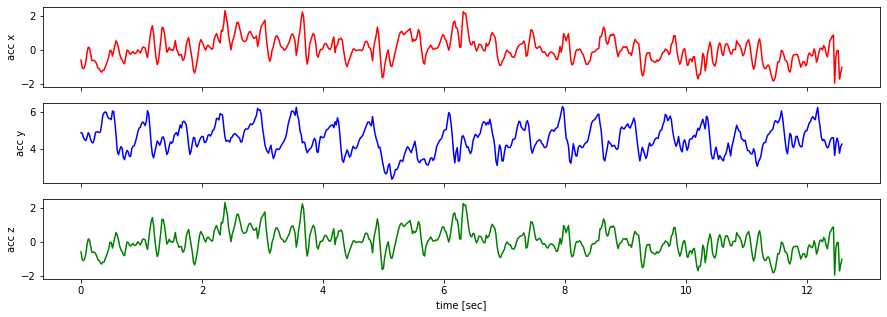

In [35]:
# plot accelerations data in each axes
fig, axs = plt.subplots(nrows=3, ncols=1,sharex=True, figsize=(15,5))

axs[0].plot(np.arange(len(data))*sample_rate,data[:,0],'-r')
axs[0].set_ylabel('acc x')

axs[1].plot(np.arange(len(data))*sample_rate,data[:,1],'-b')
axs[1].set_ylabel('acc y')

axs[2].plot(np.arange(len(data))*sample_rate,data[:,0],'-g')
axs[2].set_ylabel('acc z')

axs[2].set_xlabel('time [sec]')


plt.show()

In [36]:
# compute combined acceleromter magnitude
acc_magnitude = data[:,0]**2 + data[:,1]**2 + data[:,2]**2

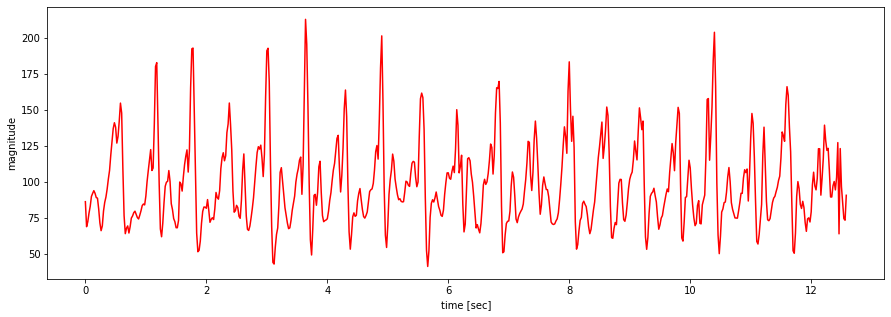

In [37]:
fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(len(acc_magnitude))*sample_rate,acc_magnitude,'-r')
plt.ylabel('magnitude')
plt.xlabel('time [sec]')
plt.show()

In [68]:
def peak_accel_threshold(data, sample_rate, peak_threshold, peaks_min_distance=0.5):
    
    peaks_min_distance_flag = True
    time_from_last_peak = float("inf") 
    steps_counter = 0
    peaks =[]

    for i, datum in enumerate(data):

        if datum > peak_threshold and peaks_min_distance_flag:
            steps_counter +=1
            peaks.append(i)
            time_from_last_peak = 0 
            
        time_from_last_peak += sample_rate
        peaks_min_distance_flag = time_from_last_peak >= peaks_min_distance
        

    return steps_counter,np.asarray(peaks)

In [69]:
steps_counter,peaks = peak_accel_threshold(acc_magnitude,sample_rate, peak_threshold, peaks_min_distance)

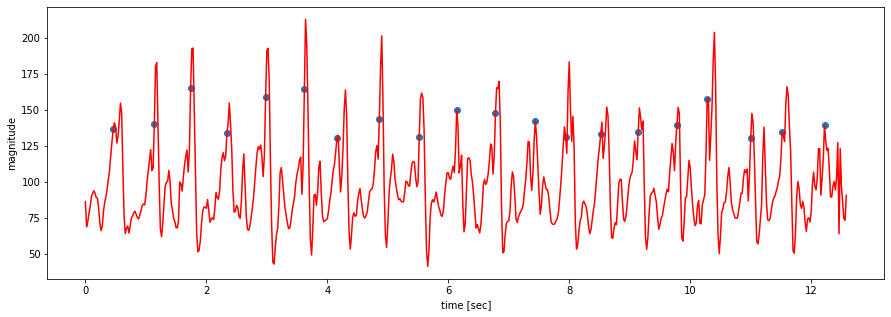

In [70]:
fig = plt.figure(figsize=(15,5))
plt.plot(np.arange(len(acc_magnitude))*sample_rate,acc_magnitude,'-r')
plt.scatter(peaks*sample_rate,acc_magnitude[peaks])
plt.ylabel('magnitude')
plt.xlabel('time [sec]')
plt.show()